# Telco Customer Churn Analysis


## Introduction

In this project my aim is to "Predict behavior to retain customers and analyze all relevant customer data and develop focused customer retention programs."


For this project I will follow the steps of data analysis process:

* Ask
* Prepare
* Process
* Analyze
* Share
* Act

### Ask

##### What is the problem I'm trying to solve?

My aim is to "Predict behavior to retain customers and analyze all relevant customer data and develop focused customer retention programs." In this file I'll perform some data analysis.

### Prepare

##### About dataset

This data set contains Telsco customer data and showing customers left in one month.

Link for data set : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

* How is the data organized?How can I verify the data’s integrity?

The data is organized into a csv file which contains 21 columns.Each row represents a customer, each column contains customer’s attributes described on the column Metadata. Each column has the correct type of data.

### Process

* import required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Load the csv file

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Top 5 rows of data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [5]:
df.shape

(7043, 21)

In [6]:
print('No of rows : ', df.shape[0])
print('No of coulmns : ', df.shape[1])

No of rows :  7043
No of coulmns :  21


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* check descriptive statictics of numeric variables in dataframe

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month



.

* count of target variable per Category

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
df['Churn'].value_counts() * 100 / len(df)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Text(0.5, 1.0, 'count of target variable per category')

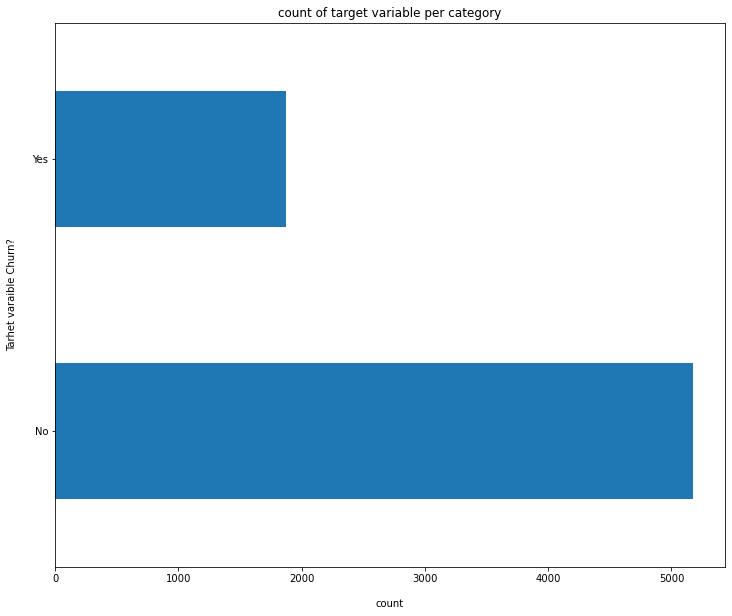

In [13]:
df['Churn'].value_counts().plot(kind = 'barh', figsize = (12,10))
plt.xlabel("count", labelpad = 15)
plt.ylabel("Tarhet varaible Churn?", labelpad = 15)
plt.title("count of target variable per category")

So the percentages of a customer being Churn is 26.537(total no of 1869) and not is 73.46(total no of 5174).
* Data is **imbalanced**, ratio = 73:27
* So we analyse the data with other features while taking the target values separately to get some insights.

.

##### Missing Data - Initial Intuition

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally we can delete the columns, if we have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.


.

* Check for missing values

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that this data set don;t have any missing data

##### Data cleaning

* Checking the total cahrgers column

In [15]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


We can see that the TotalChargers column is type object. But it should be numerical type for further analysis. So I'll change the data type of that column

In [16]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = "coerce")

In [17]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


So we can see that thedata type has been changed to float


Check for the null values

In [18]:
df.TotalCharges.isnull().sum()

11

As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [19]:
df[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [20]:
df.TotalCharges.isnull().sum() * 100 / len(df)

0.15618344455487718

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [21]:
df.dropna(how = 'any', inplace = True)

In [22]:
df.TotalCharges.isnull().sum()

0

So we can see that there are no null values.


.

* Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [23]:
# Get the max tenure
df.tenure.max()

72

In [24]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [25]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

* Reomove columns not required for analyze
(columns customerID and tenure)

In [26]:
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


We can see that those columns are deleted.

.

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


As we can see the data set is clean now. We can analyze the data set now.




.

### Analyze

##### Univariate Analysis

#### Plot distibution of individual predictors by churn

* Distribtion of Gender vs churn

Text(0.5, 1.0, 'Distribution of Gender vs Churn')

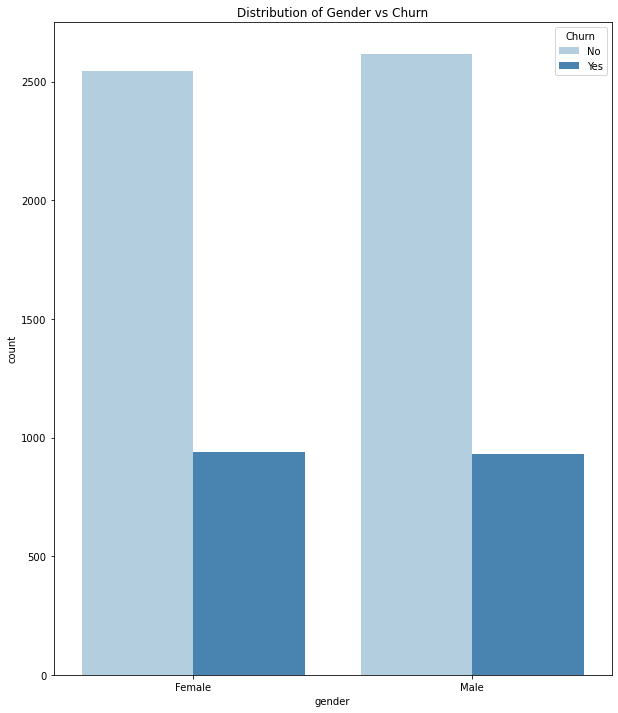

In [29]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'gender', hue = 'Churn', palette='Blues')
plt.title('Distribution of Gender vs Churn')

As we can see both female and male value counts seems equal. So we cannot get any insights from this. we can conclude this is not a import feature for our Churn Analysis


.


* Distribution of Senior Citizen vs Churn

Text(0.5, 1.0, 'Distribution of Senior Citizen vs Churn')

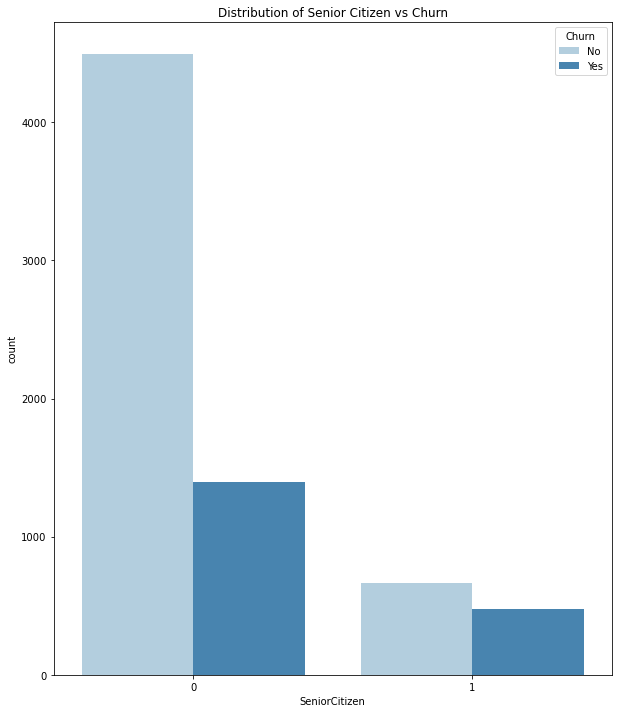

In [30]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'SeniorCitizen', hue = 'Churn', palette='Blues')
plt.title('Distribution of Senior Citizen vs Churn')

As per the diagram we can see there are more number of non seniors in the dataset. But when we look at the ratios of Churn and Not churn, The ratio of Churners in Senior citizens is very high. So we can say that if the customer is a senior citizen, he is more likely to Churn.


.

* Distribution of Partner vs Churn

Text(0.5, 1.0, 'Distribution of Partner vs Churn')

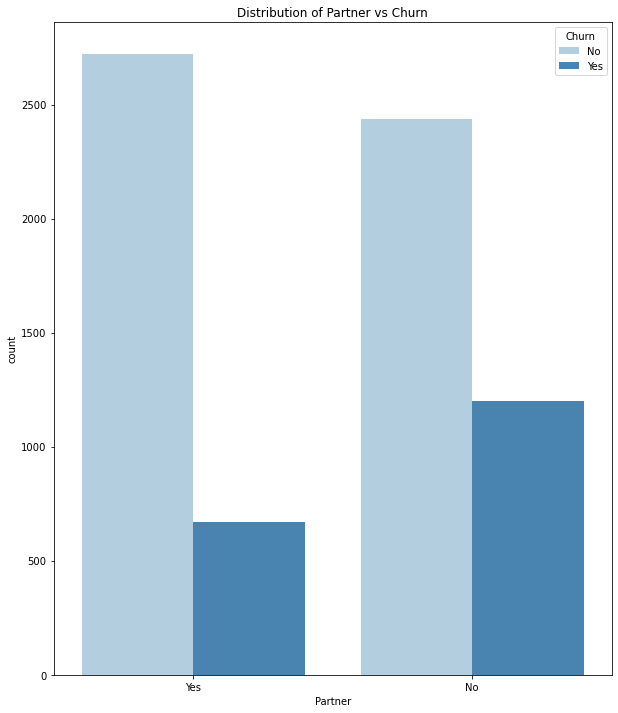

In [31]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'Partner', hue = 'Churn', palette='Blues')
plt.title('Distribution of Partner vs Churn')

In here also we can say that the Churn ratio is high when the customer doesn't have a partner. So we can say that if the customer has a prtner, he is less likely to Churn.



.

* Distribution of Dependents vs Churn

Text(0.5, 1.0, 'Distribution of Dependents vs Churn')

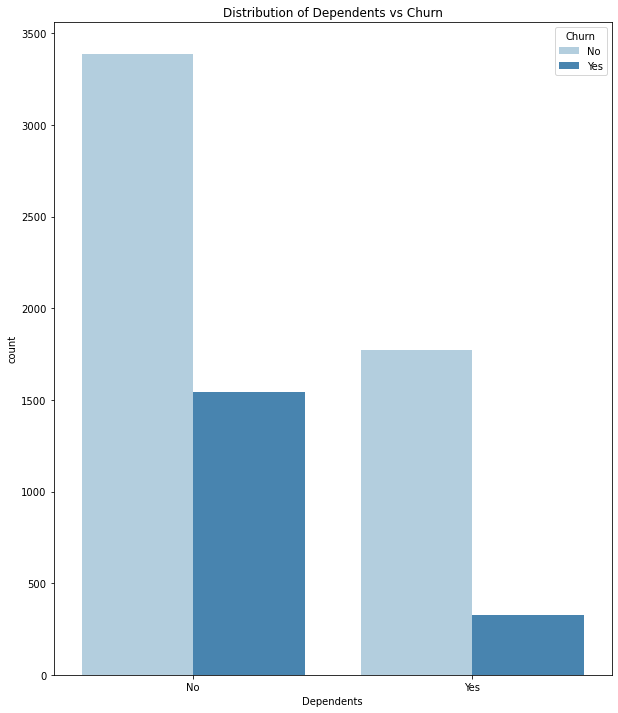

In [32]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'Dependents', hue = 'Churn', palette='Blues')
plt.title('Distribution of Dependents vs Churn')

As per the diagram we can say that there are more number of customers having dependents in the datset. Also we can say that If the customer has no dependents, he is more likely to Churn 

.

* Distribution of Phone Service vs Churn

Text(0.5, 1.0, 'Distribution of Phone Service vs Churn')

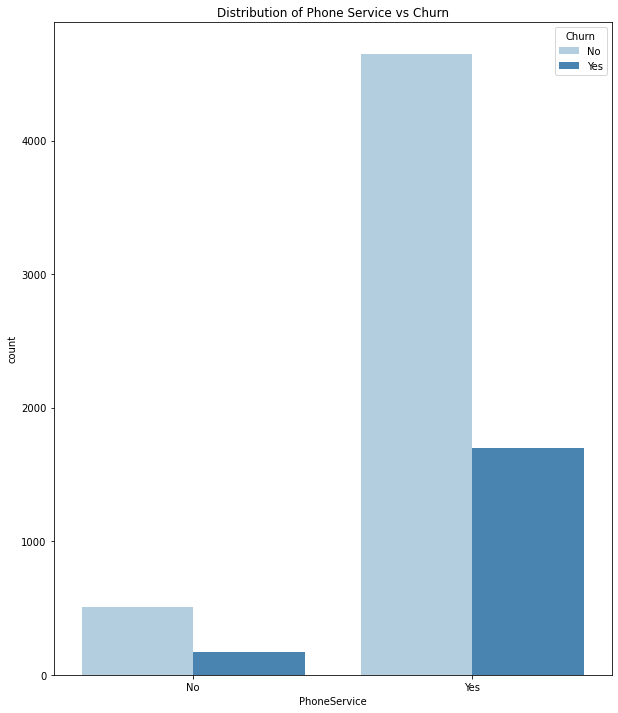

In [33]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'PhoneService', hue = 'Churn', palette='Blues')
plt.title('Distribution of Phone Service vs Churn')

We can see that there are more customers that have phone services

.

 * Distribution of Multiple Lines vs Churn

Text(0.5, 1.0, 'Distribution of Multiple Lines vs Churn')

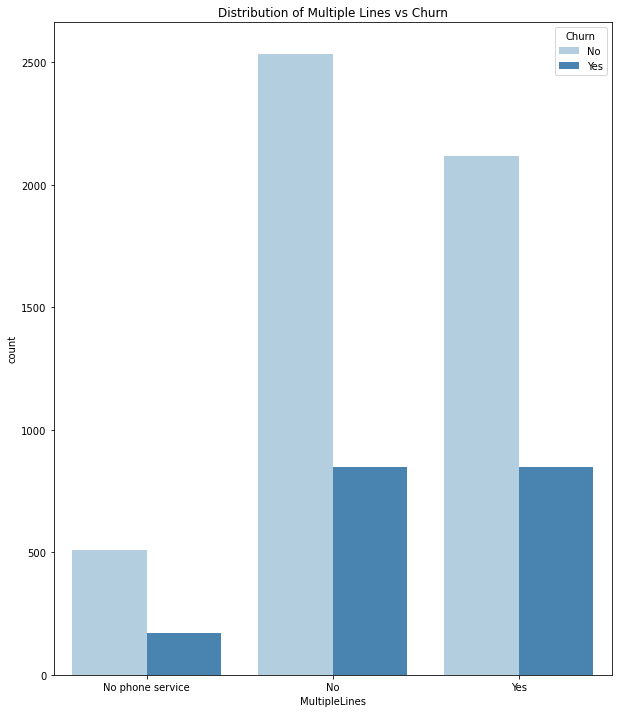

In [34]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn', palette='Blues')
plt.title('Distribution of Multiple Lines vs Churn')

We can say that there are more customers That has mutilple lines but we can't say anything futher that because the ratios looks same.

.

* Distribution of Internet Service vs Churn

Text(0.5, 1.0, 'Distribution of Internet Service  vs Churn')

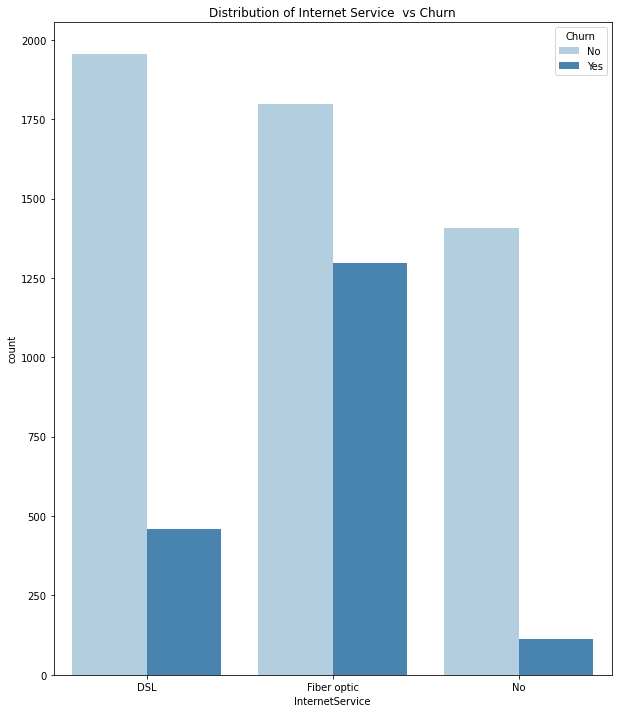

In [35]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'InternetService', hue = 'Churn', palette='Blues')
plt.title('Distribution of Internet Service  vs Churn')

We can say that there are more customers having DSL as internet service but looking at the Ratios, we can say that Customers having Fiber Optic as internet service are more likely to Churn.

.

* Distribution of Online Security vs Churn

Text(0.5, 1.0, 'Distribution of Online Security  vs Churn')

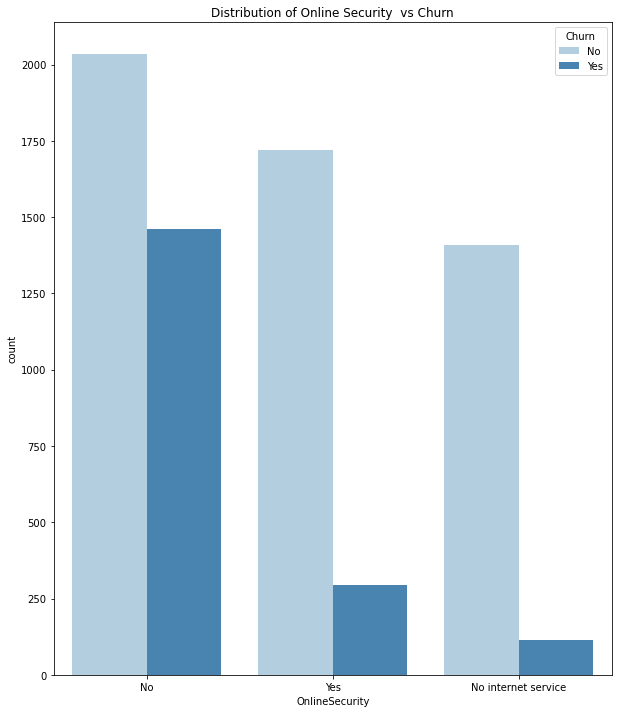

In [36]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'OnlineSecurity', hue = 'Churn', palette='Blues')
plt.title('Distribution of Online Security  vs Churn')

Looking athe the distribution, we can say that there are more people having no Online Security and the Churn ratio of them is high.

.

* Distribution of Online Backup vs Churn

Text(0.5, 1.0, 'Distribution of Online Backup vs Churn')

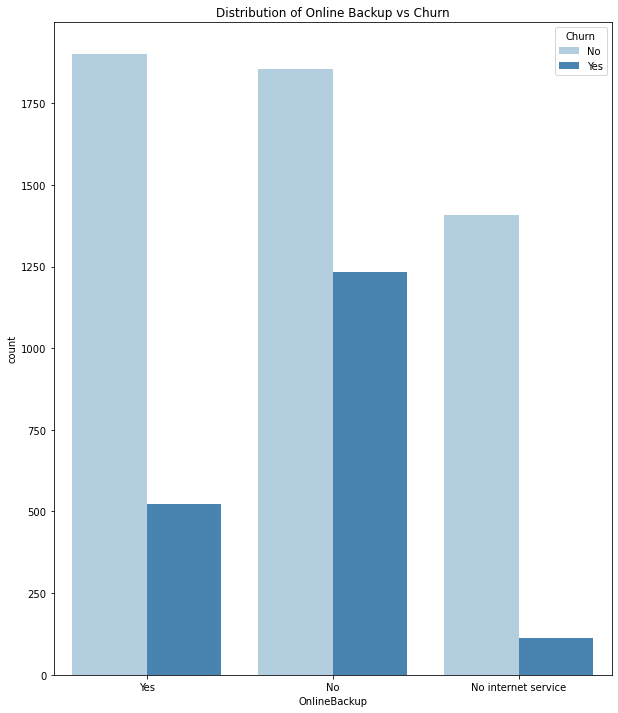

In [37]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'OnlineBackup', hue = 'Churn', palette='Blues')
plt.title('Distribution of Online Backup vs Churn')

We can say that If a customer having no Backup, he is more likely to Churn.

.

* Distribution of Device protection vs Churn

Text(0.5, 1.0, 'Distribution of Device protection  vs Churn')

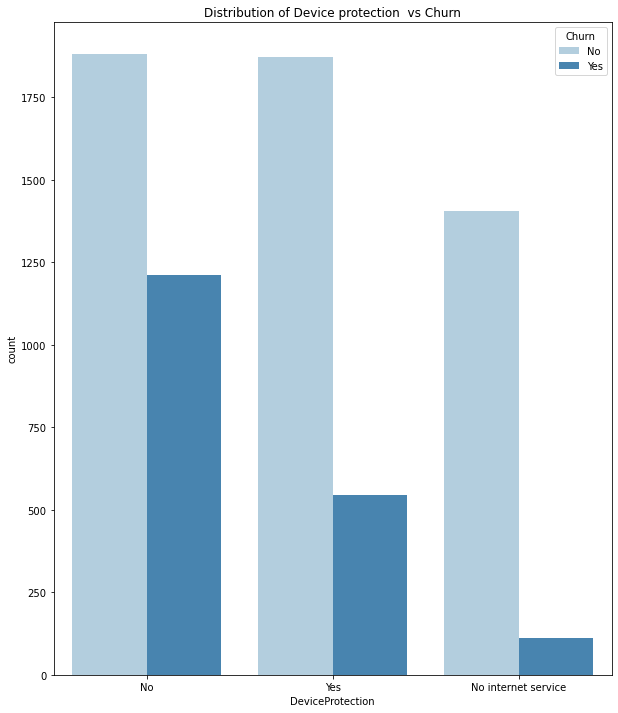

In [38]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'DeviceProtection', hue = 'Churn', palette='Blues')
plt.title('Distribution of Device protection  vs Churn')

Here also we can see that more people having no Device Protection as they are more likely to Churn.

.

* Distribution of Tech support vs Churn

Text(0.5, 1.0, 'Distribution of Tech support vs Churn')

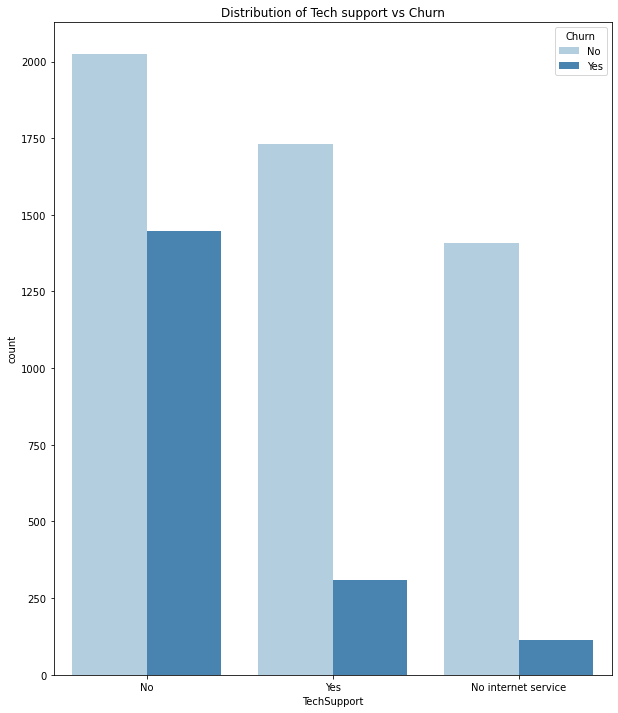

In [39]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'TechSupport', hue = 'Churn', palette='Blues')
plt.title('Distribution of Tech support vs Churn')

We can see that more people doesn't having Tech Support and they also more likely to Churn.

.

* Distribution of Contract duration vs Churn

Text(0.5, 1.0, 'Distribution of Contract vs Churn')

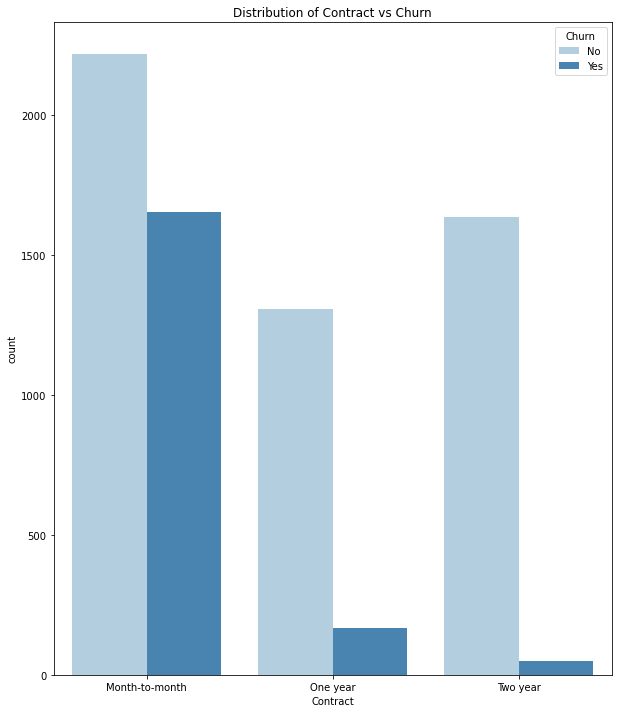

In [40]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'Contract', hue = 'Churn', palette='Blues')
plt.title('Distribution of Contract vs Churn')

We can see that customers having monthly Contracts are the most and they are more likely to Churn. But this could also happen beacuse if the customer having one year or more contracts and they are still in the begginnig part or middle part of the contract. May be they are not ready for Churn.

.

* Distribution of Paperless Billing vs Churn

Text(0.5, 1.0, 'Distribution of Paperless Billing  vs Churn')

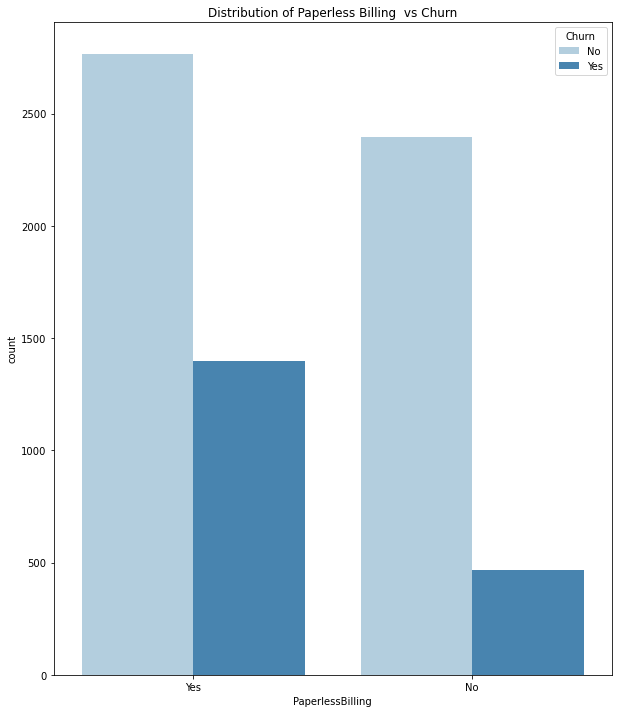

In [41]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn', palette='Blues')
plt.title('Distribution of Paperless Billing  vs Churn')

As per the diagram we can say that customers with paperless billing are more likely to Churn.

.

* Distribution of Payment method vs Churn

Text(0.5, 1.0, 'Distribution of Payment Method vs Churn')

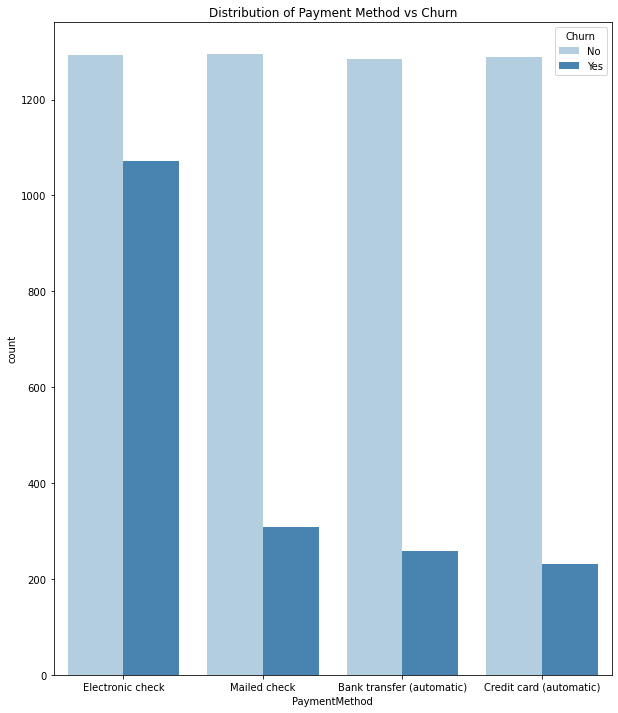

In [42]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'PaymentMethod', hue = 'Churn', palette='Blues')
plt.title('Distribution of Payment Method vs Churn')

We can say that customers paying electronic Checks are more likely to Churn.

.

* Distribution of Tenure Group vs Churn

Text(0.5, 1.0, 'Distribution of Tenure Group vs Churn')

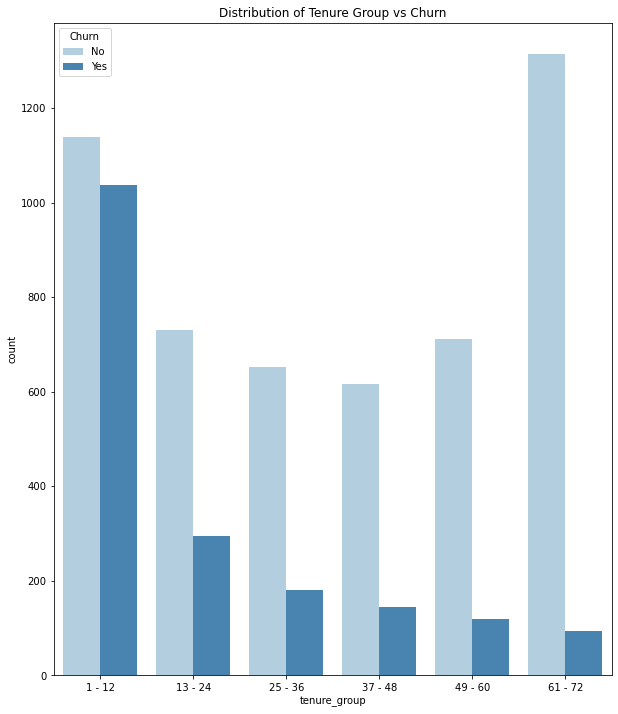

In [43]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'tenure_group', hue = 'Churn', palette='Blues')
plt.title('Distribution of Tenure Group vs Churn')

We can say that cusomres having Tenure less that one year are more likely to Churn.

.

##### Converting the Variable Churn into binary numeric variable yes = 1, no = 0 for further Analysis

In [46]:
df['Churn'] = np.where(df.Churn == 'Yes', 1, 0)

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


We can see that Churn turned into binary variable.

.

##### Converting all categorical variables into dummy variables for further analysis and predictions

In [48]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


.

* Relationship between monthly chargers and Total chargers

Text(0.5, 1.0, 'Relationship between monthly chargers and Total chargers')

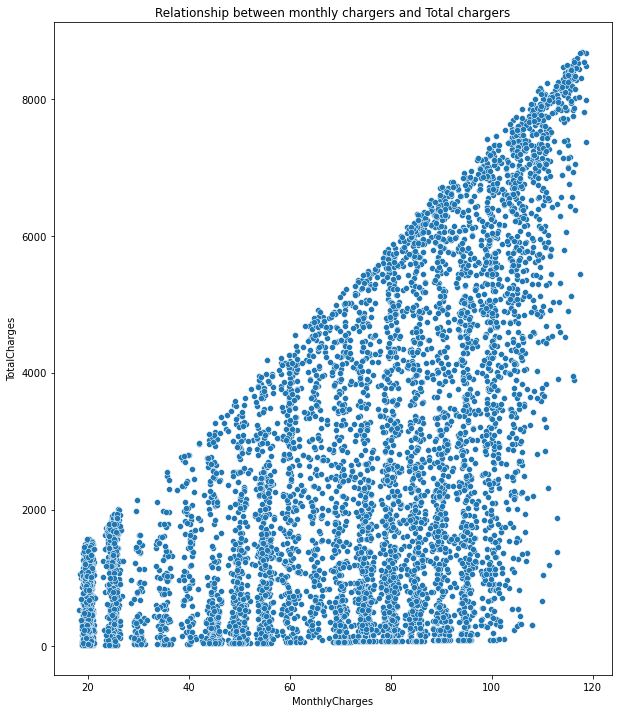

In [52]:
plt.figure(figsize = (10,12))
sns.scatterplot(data = df_dummies, x = 'MonthlyCharges', y= 'TotalCharges')
plt.title('Relationship between monthly chargers and Total chargers')

Total Charges increase as Monthly Charges increase - as expected

.

* Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

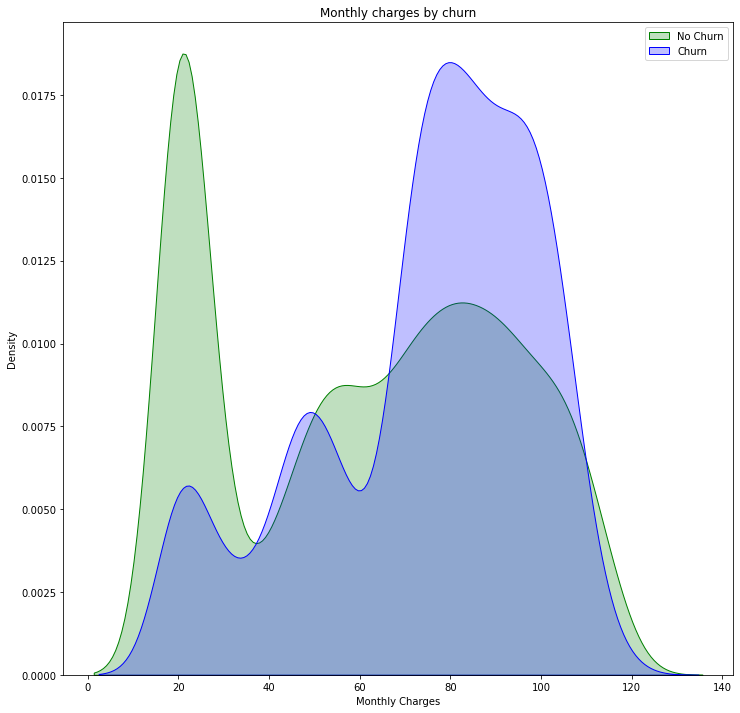

In [62]:
plt.figure(figsize = (12,12))
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],color="Green", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Churn is high when Monthly Charges are high.

.

Text(0.5, 1.0, 'Monthly charges by churn')

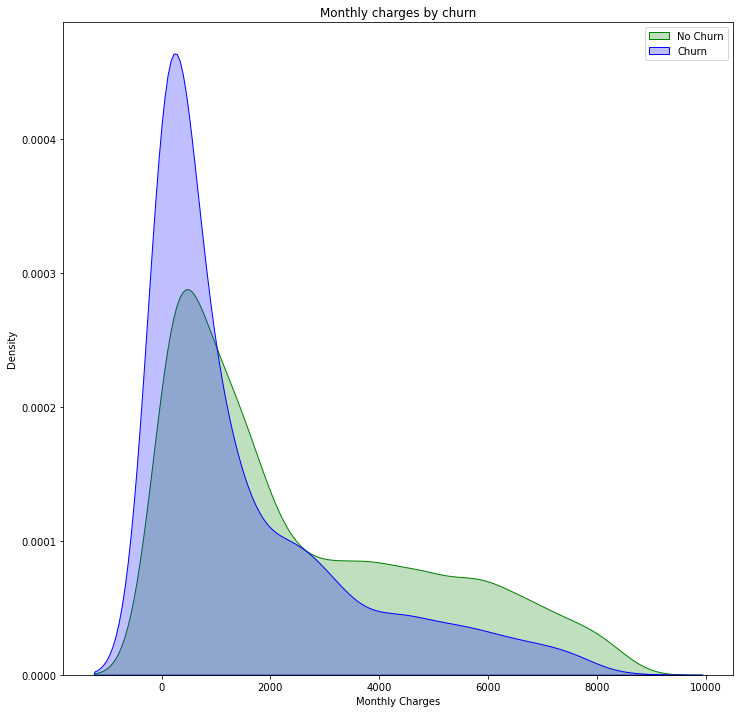

In [63]:
plt.figure(figsize = (12,12))
Mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],color="Green", shade = True)
Mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

__Surprising insight as higher Churn at lower Total Charges__

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

.

##### Build a corelation of all predictors with 'Churn'

<AxesSubplot:>

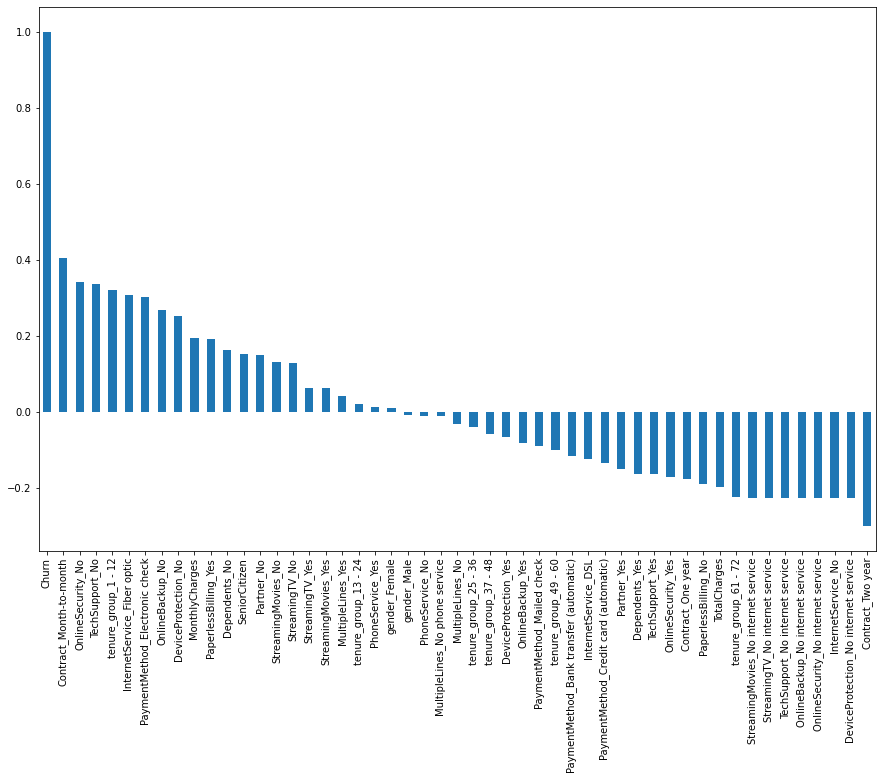

In [74]:
plt.figure(figsize=(15,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

* Using Heatmap

<AxesSubplot:>

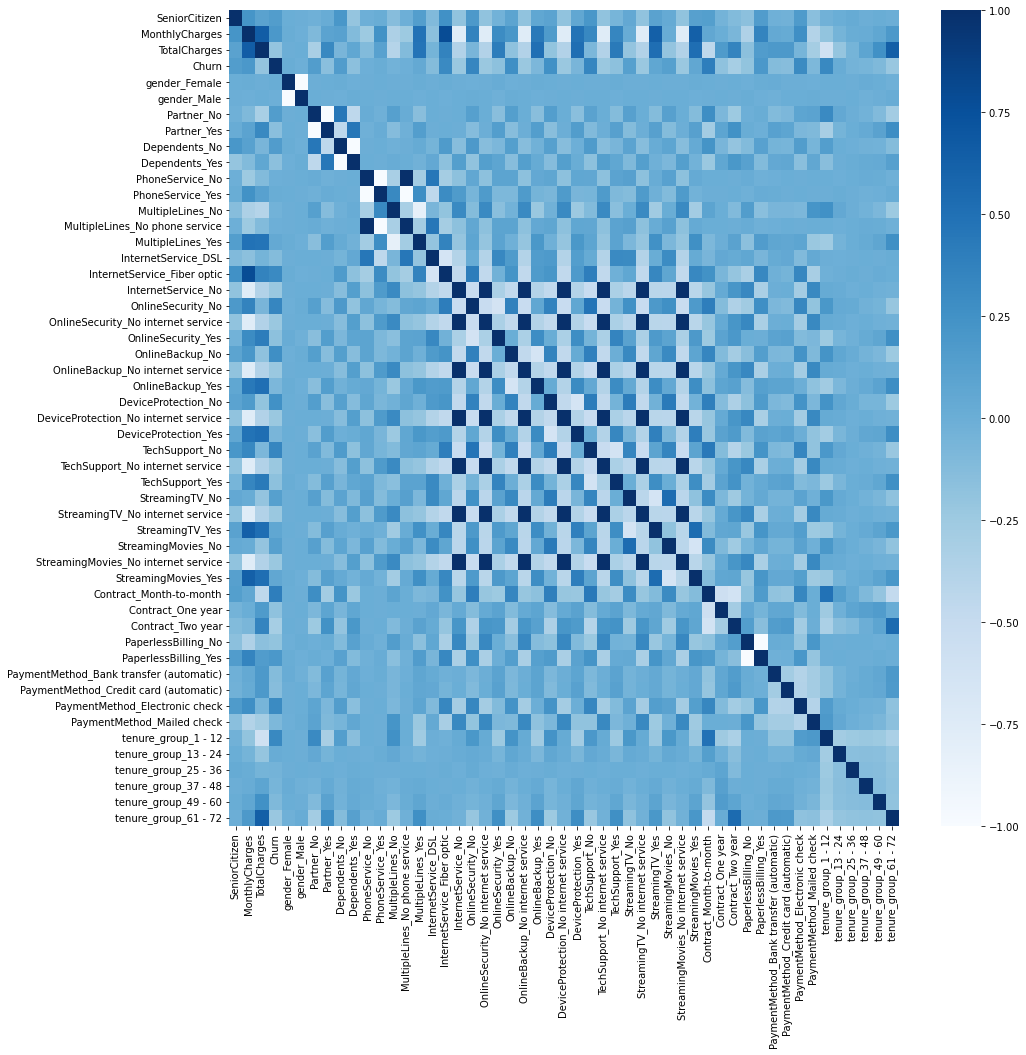

In [76]:
plt.figure(figsize = (15,15))
sns.heatmap(df_dummies.corr(), cmap = 'Blues')

__insights :__

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn.

.

##### Bivariate Analysis

* Creating different data frames for Churners and Non-Churners

In [83]:
Churners = df.loc[df['Churn'] == 1]
NonChurners = df.loc[df['Churn'] == 0]

In [84]:
Churners.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


In [85]:
NonChurners.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,13 - 24
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,1 - 12


* Distribution of Gender for Churned Customers

Text(0.5, 1.0, 'Distribution of Gender for Churned cusomers')

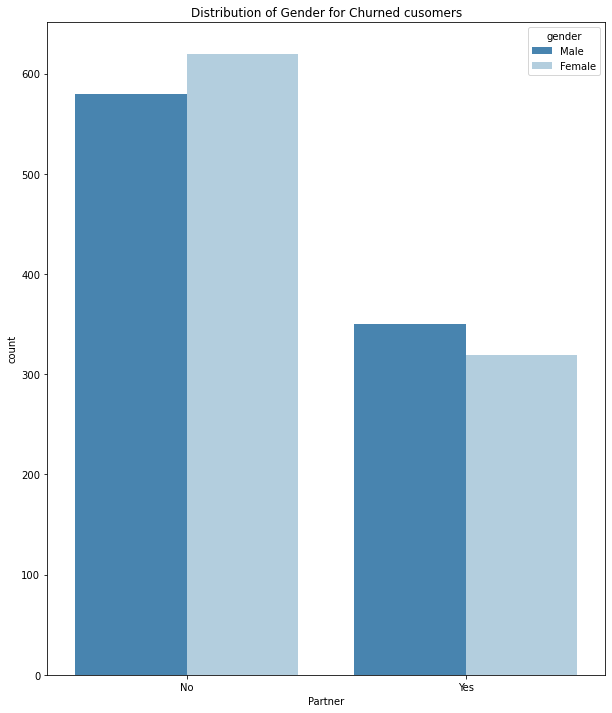

In [104]:
plt.figure(figsize = (10,12))
sns.countplot(data = Churners, x = 'Partner', hue = 'gender', palette='Blues_r')
plt.title('Distribution of Gender for Churned cusomers')

We can say that both the genders having No partners are more likely to Churn.

.

* Distribution of Gender for Non-Churned Customers

Text(0.5, 1.0, 'Distribution of Gender for Non-Churned cusomers')

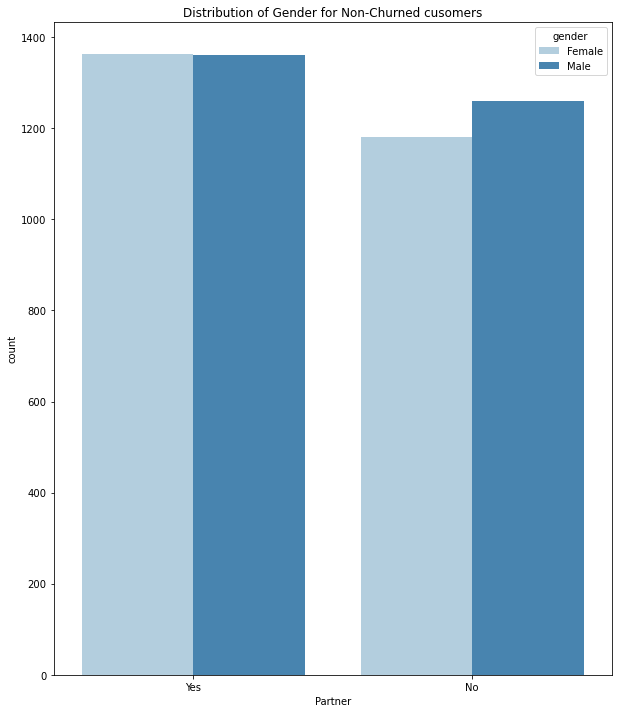

In [93]:
plt.figure(figsize = (10,12))
sns.countplot(data = NonChurners, x = 'Partner', hue = 'gender', palette='Blues')
plt.title('Distribution of Gender for Non-Churned cusomers')

* Distribution of PaymentMethod and gender for Churners

Text(0.5, 1.0, 'Distribution of Gender and PaymentMethod for Churned cusomers')

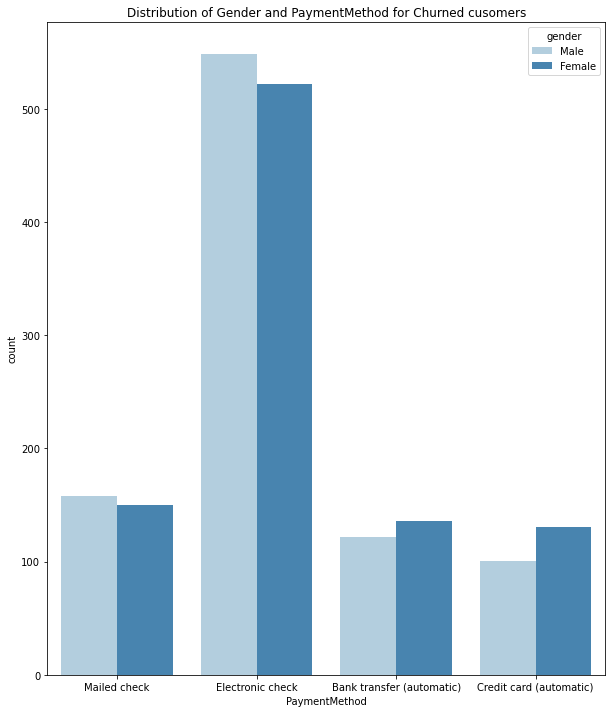

In [98]:
plt.figure(figsize = (10,12))
sns.countplot(data = Churners, x = 'PaymentMethod', hue = 'gender', palette='Blues')
plt.title('Distribution of Gender and PaymentMethod for Churned cusomers')

As per the distribution we can say that if the customer's payment method is Electronic check, he or she is more likely to Churn regardless of the customer's gender

.

* Distribution of Contract and gender for Churned Custome

Text(0.5, 1.0, 'Distribution of Contract and gender for Churned cusomers')

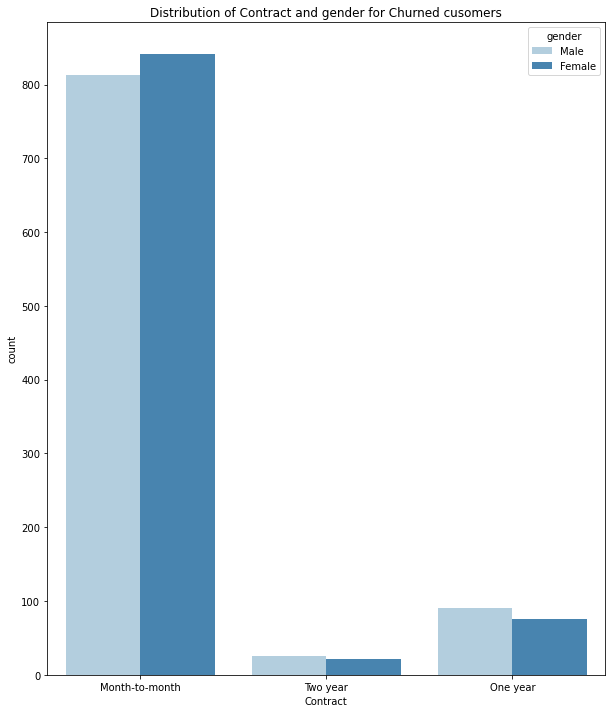

In [97]:
plt.figure(figsize = (10,12))
sns.countplot(data = Churners, x = 'Contract', hue = 'gender', palette='Blues')
plt.title('Distribution of Contract and gender for Churned cusomers')

We can say that if the customer's Contract is Electronic month-to-month, he or she is more likely to Churn regardless of the customer's gender

.

* Distribution of TechSupport and gender for Churned Customers

Text(0.5, 1.0, 'Distribution of TechSupport and gender for Churned cusomers')

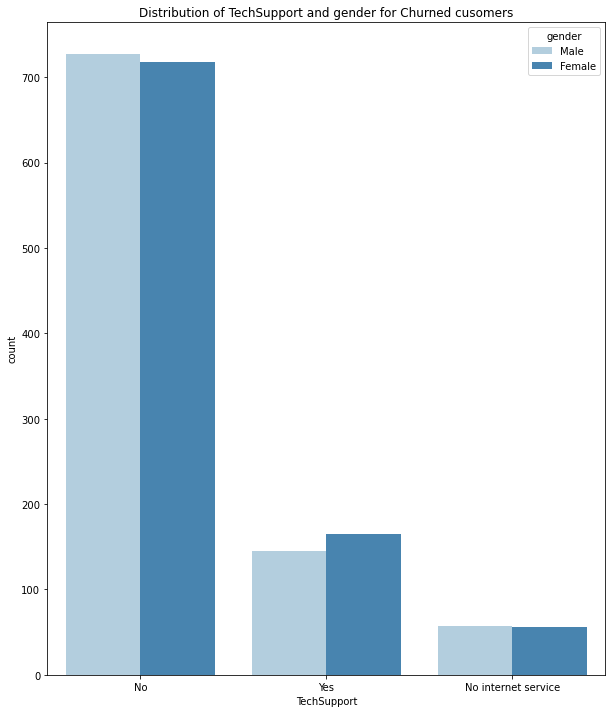

In [99]:
plt.figure(figsize = (10,12))
sns.countplot(data = Churners, x = 'TechSupport', hue = 'gender', palette='Blues')
plt.title('Distribution of TechSupport and gender for Churned cusomers')

We can say that if the customer doesn't have a Tech Support, he or she is more likely to Churn regardless of the customer's gender.

.

* Distribution of SeniorCitizen and gender for Churned customers

Text(0.5, 1.0, 'Distribution of SeniorCitizen and gender for Churned cusomers')

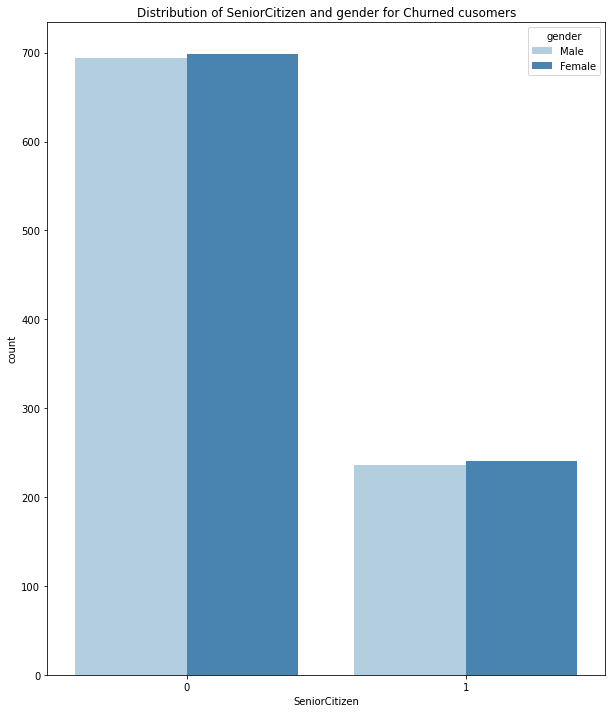

In [100]:
plt.figure(figsize = (10,12))
sns.countplot(data = Churners, x = 'SeniorCitizen', hue = 'gender', palette='Blues')
plt.title('Distribution of SeniorCitizen and gender for Churned cusomers')

We can say that if the customer is a Senior Citizen, he or she is less likely to Churn regardless of the gender. But if the customer is not a Senior Citizen, he or she is more likely to Churn regardless of the gender.

.

### Share

The share phase is usually done by building a presentation. We can share our findings over a presentation.

##### Insights we got from data after analyze

* Electronic check medium are the highest churners
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* No Online security, No Tech Support category are high churners
* Non senior Citizens are high churners

* **Surprising insight as higher Churn at lower Total Charges**


,

### Act

In this phase the Stakeholders will confirm the insights and will take actions according to that.

.




.



To further operations ie Building a predictor, I will save the data set.

In [105]:
df_dummies.to_csv('tel_churn.csv')